The secondvisits were implemented on 20230630

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.convolution import convolve, Box1DKernel
from astropy.visualization import simple_norm
from photutils.aperture import aperture_photometry
from photutils.aperture import ApertureStats
import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from photutils.aperture import CircularAnnulus, CircularAperture
from astropy.stats import SigmaClip
from scipy.interpolate import interp1d

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [44]:
epoch = 2
path = '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch{}/'.format(epoch)
wpath = '{}wfc3/'.format(path)
apath = '{}acs/'.format(path)

WFC3 first

In [45]:
drcs = glob.glob('{}*drc.fits'.format(wpath))
drcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03010_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03020_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03031_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03041_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03051_drc.fits']

In [46]:
flcs = glob.glob('{}*flc.fits'.format(wpath))
flcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03yzq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z0q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zcq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zeq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z8q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z2q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z7q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zdq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z9q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zaq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zbq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03yvq_flc.fits']

In [47]:
eetab = Table.read('{}../wfc3uvis2_aper_007_syn.csv'.format(path))
# eetab

In [48]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for drc in drcs:
    hdr = fits.getheader(drc, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ROOTNAME'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
drcargs = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[drcargs], bands[drcargs], times[drcargs], expt[drcargs], dates[drcargs], datasets[drcargs] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

# for i in range(len(flcs)):
#     print('{} & WFC3/UVIS & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

if3i03010_drc.fits F275W 60125.72009602 1770.0
if3i03020_drc.fits F280N 60125.72827898 1770.0
if3i03031_drc.fits F225W 60125.73649639 1180.0
if3i03041_drc.fits F225W 60125.80214454 1180.0
if3i03051_drc.fits F225W 60125.86817454 1180.0


[None, None, None, None, None]

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03010_drc.fits
F275W
1770.0
   aperture_sum   
------------------
1.1200445823968128
4.638053347077814e-18 1.0404758243252159e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   489.8   751.7         1.12          0.02516 -0.001289               1.121


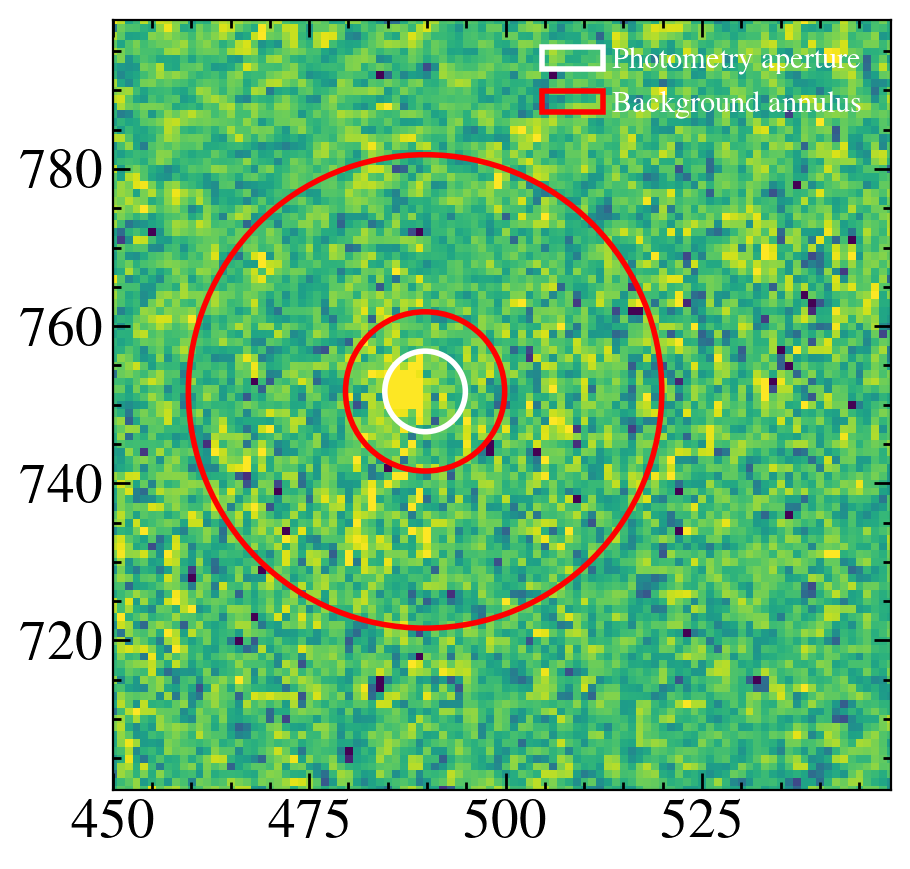

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03020_drc.fits
F280N
1770.0
   aperture_sum   
------------------
0.8269533148357078
5.820356102121134e-17 1.5708297800657128e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   489.8   751.7        0.827          0.02161   0.02606              0.8009


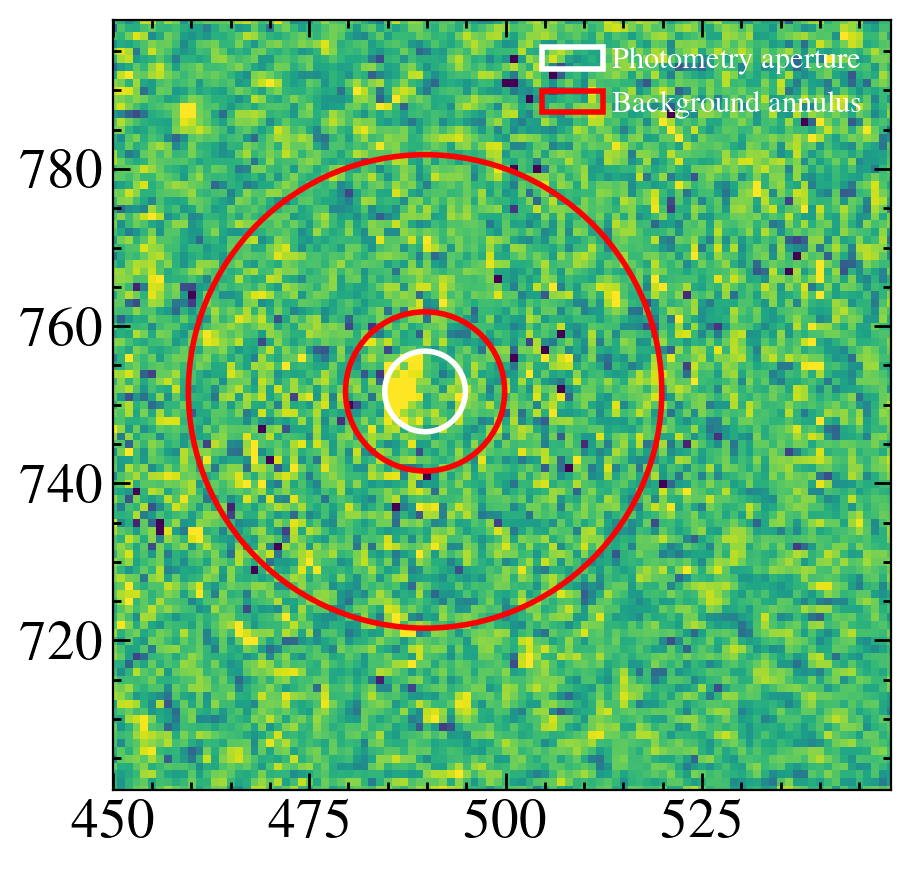

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03031_drc.fits
F225W
1180.0
   aperture_sum   
------------------
0.9776003315280791
5.612012332912505e-18 1.7165349640183968e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   489.8   751.7       0.9776          0.02878   0.03657               0.941


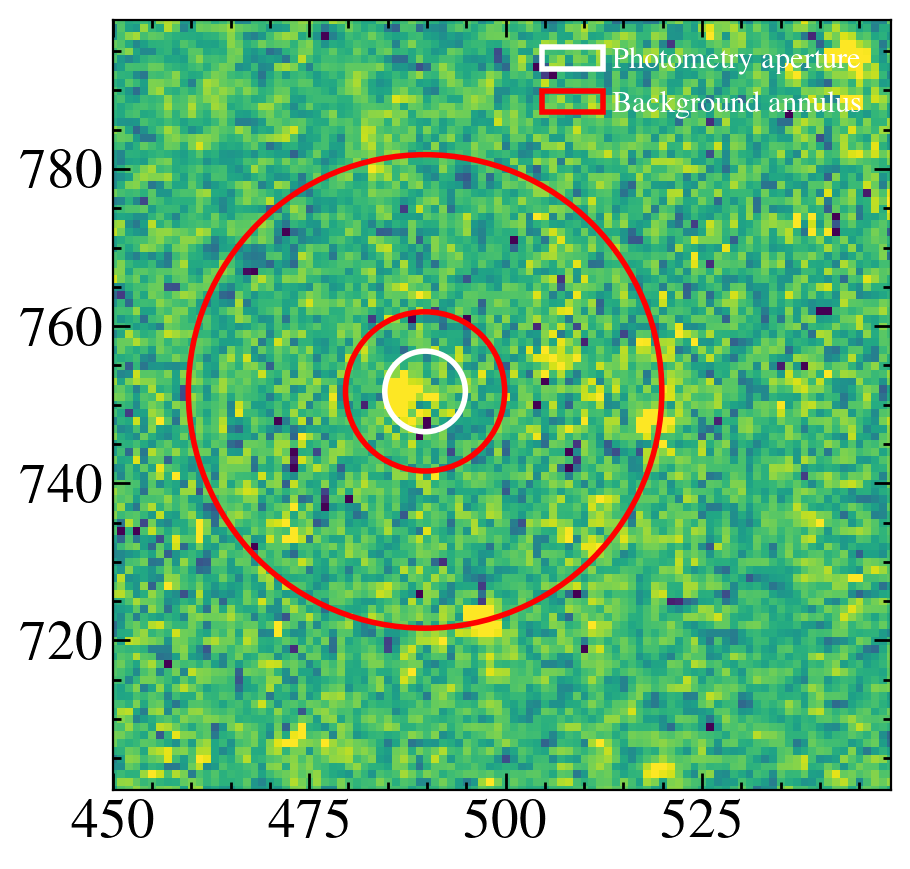

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03041_drc.fits
F225W
1180.0
   aperture_sum   
------------------
0.4278355282078153
2.4395950574151916e-18 1.135561132006713e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   489.8   751.7       0.4278          0.01904   0.01876              0.4091


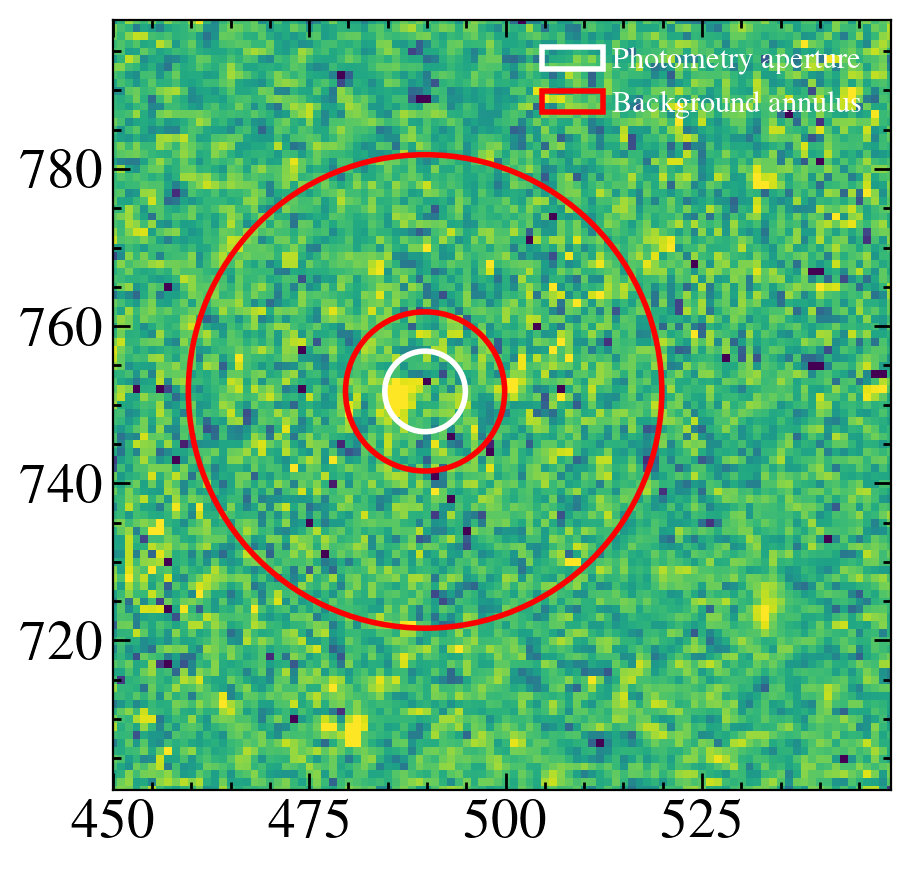

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03051_drc.fits
F225W
1180.0
   aperture_sum   
------------------
0.5891986942817079
3.3924254632917556e-18 1.3326100856250558e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   489.8   751.7       0.5892          0.02235   0.02035              0.5688


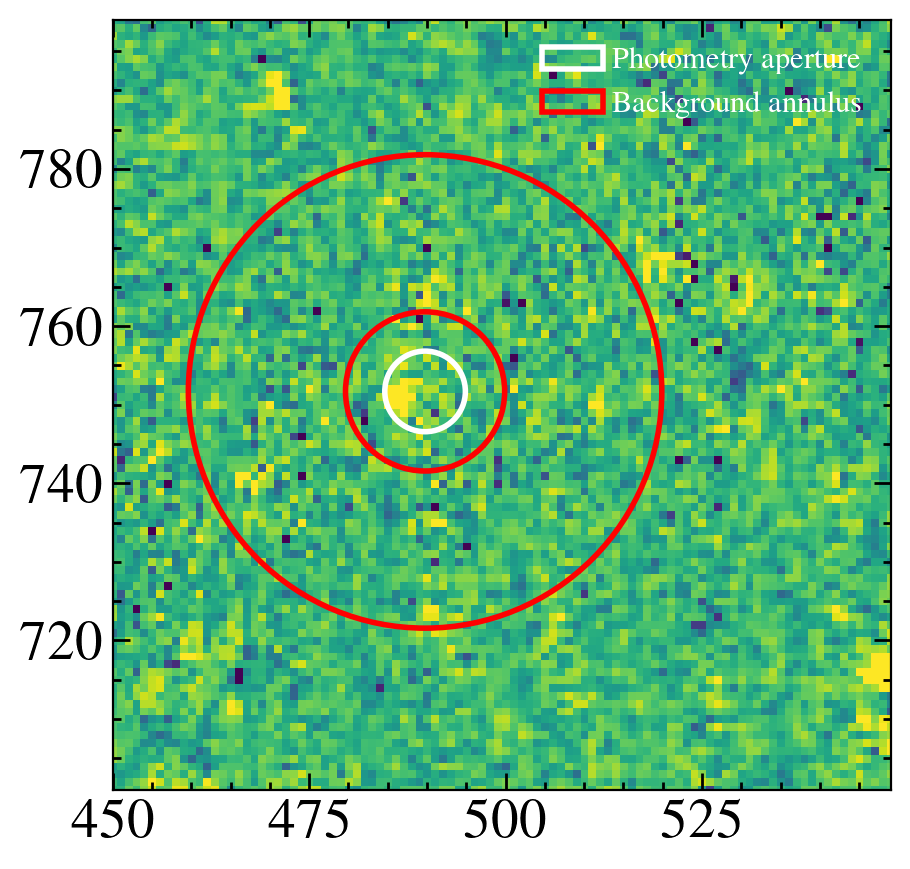

In [49]:
wfc3_pos = [(489.752, 751.70)]
pixscale = 0.039
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
counts = []
counts_errs = []
bkgs = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
drcsort = np.array(drcs)[drcargs]
for drc in drcsort:
    print(drc)
    hdul = fits.open(drc)
    filt = hdul[0].header['FILTER'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
    data = np.nan_to_num(data, 0.0)
#     error = hdul[2].data
#     dq = hdul[3].data
#     mask = dq != 0
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(450, 549)
    plt.ylim(701, 799)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(wfc3_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(wfc3_pos, r_in=ap_pix+5, r_out=ap_pix+25)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
    phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
    phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam /ee
    flux_err = phot_table['aperture_sum_err'][0]* photflam /ee
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)
    
    counts.append(phot_table['aperture_sum_bkgsub'])
    counts_errs.append(phot_table['aperture_sum_err'])
    bkgs.append(phot_table['total_bkg'])

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)



savdat = Table([starts, ends, expt, bands, fluxes*u.erg/u.s/u.cm**2/u.AA, flux_errs*u.erg/u.s/u.cm**2/u.AA, roots,counts ,counts_errs,bkgs], 
               names = ['EXPSTART', 'EXPEND', 'EXPTIME', 'FILTER', 'FLUX', 'ERROR', 'ROOTNAME', 'COUNTS', 'COUNTS_ERROR', 'BACKGROUND'])
savdat.write('results/epoch{}_wfc3_drc_photometry.ecsv'.format(epoch), format='ascii.ecsv', overwrite=True)

In [50]:
eetab = Table.read('{}../wfc3uvis2_aper_007_syn.csv'.format(path))
eetab

FILTER,WAVELENGTH,APER#0.04,APER#0.08,APER#0.12,APER#0.16,APER#0.20,APER#0.24,APER#0.28,APER#0.32,APER#0.36,APER#0.40,APER#0.44,APER#0.48,APER#0.51,APER#0.55,APER#0.59,APER#0.63,APER#0.67,APER#0.71,APER#0.75,APER#0.79,APER#0.83,APER#0.87,APER#0.91,APER#0.95,APER#0.99,APER#1.03,APER#1.07,APER#1.11,APER#1.15,APER#1.19,APER#1.23,APER#1.27,APER#1.31,APER#1.35,APER#1.39,APER#1.43,APER#1.47,APER#1.50,APER#1.54,APER#1.58,APER#1.62,APER#1.66,APER#1.70,APER#1.74,APER#1.78,APER#1.82,APER#1.86,APER#1.90,APER#1.94,APER#1.98,APER#6.0
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
FFFFF,2000.0,0.5713,0.6311,0.6845,0.7255,0.752,0.7757,0.7946,0.8086,0.8201,0.8312,0.8435,0.8558,0.8636,0.873,0.8817,0.8913,0.902,0.9129,0.9237,0.9337,0.9424,0.9499,0.9561,0.9614,0.966,0.9699,0.9733,0.9763,0.9788,0.981,0.9828,0.9843,0.9855,0.9865,0.9873,0.988,0.9886,0.989,0.9895,0.99,0.9904,0.9909,0.9913,0.9917,0.9921,0.9924,0.9928,0.9931,0.9935,0.9938,1.0
F218W,2223.7242894298383,0.5872,0.647,0.7001,0.7405,0.766,0.7886,0.8063,0.8194,0.8305,0.841,0.8521,0.863,0.8699,0.8784,0.8863,0.8949,0.9044,0.914,0.9235,0.9324,0.9401,0.9468,0.9525,0.9575,0.9618,0.9656,0.9691,0.9722,0.9749,0.9773,0.9794,0.9813,0.9828,0.9842,0.9854,0.9865,0.9874,0.988,0.9887,0.9894,0.99,0.9906,0.9911,0.9915,0.9919,0.9922,0.9926,0.9929,0.9932,0.9934,1.0
F225W,2358.3902256101073,0.6031,0.6628,0.7157,0.7555,0.78,0.8015,0.818,0.8303,0.8409,0.8508,0.8607,0.8702,0.8762,0.8838,0.8909,0.8986,0.9069,0.9152,0.9234,0.931,0.9378,0.9438,0.9489,0.9535,0.9576,0.9614,0.9648,0.968,0.9709,0.9736,0.976,0.9782,0.9802,0.9819,0.9835,0.9849,0.9862,0.987,0.988,0.9889,0.9896,0.9903,0.9909,0.9913,0.9917,0.9921,0.9924,0.9926,0.9929,0.9931,1.0
F275W,2703.297606591226,0.0639,0.295,0.5681,0.7241,0.79,0.8217,0.8389,0.8499,0.8583,0.8656,0.8722,0.8783,0.8826,0.8884,0.8946,0.9008,0.9065,0.912,0.9173,0.9225,0.9275,0.9324,0.9371,0.9417,0.9459,0.95,0.9536,0.9569,0.9599,0.9626,0.9649,0.967,0.9689,0.9705,0.972,0.9733,0.9745,0.9753,0.9764,0.9773,0.9782,0.979,0.9798,0.9805,0.9812,0.9818,0.9824,0.983,0.9835,0.984,1.0
F300X,2805.8406941029884,0.24029,0.54924,0.70461,0.77454,0.81001,0.83034,0.84388,0.85413,0.86251,0.86973,0.87606,0.88211,0.88814,0.89416,0.90025,0.90629,0.91201,0.91738,0.92268,0.92789,0.93306,0.93813,0.94289,0.94718,0.95122,0.95509,0.9588,0.9621,0.96487,0.96745,0.9698,0.97187,0.97376,0.97563,0.97718,0.97982,0.98259,0.98505,0.98564,0.98622,0.98681,0.9874,0.98799,0.98858,0.98916,0.98975,0.99034,0.99093,0.99152,0.9921,1.0
F280N,2829.9788818500247,0.27019,0.5746,0.71539,0.78092,0.81427,0.8329,0.84566,0.85563,0.86369,0.87069,0.87688,0.8818,0.88687,0.89218,0.89723,0.90212,0.90763,0.91256,0.91684,0.92161,0.92704,0.9322,0.93738,0.94274,0.94732,0.95172,0.95569,0.95976,0.96335,0.96678,0.96984,0.97276,0.97453,0.97543,0.9767,0.97964,0.98244,0.98493,0.98552,0.98612,0.98671,0.9873,0.9879,0.98849,0.98908,0.98968,0.99027,0.99087,0.99146,0.99205,1.0
F336W,3354.6557118136925,0.28165,0.61048,0.75425,0.8107,0.83977,0.85813,0.8717,0.88155,0.88869,0.8944,0.89933,0.90364,0.90736,0.91051,0.91344,0.91667,0.92039,0.92426,0.92806,0.93173,0.9351,0.93816,0.94105,0.94392,0.94682,0.94982,0.95291,0.95594,0.95885,0.9616,0.96416,0.96661,0.96888,0.97096,0.97289,0.97518,0.97782,0.98022,0.98107,0.98193,0.98279,0.98365,0.98451,0.98537,0.98623,0.98709,0.98795,0.98881,0.98966,0.99052,1.0
F343N,3435.193249408308,0.2614,0.58851,0.74156,0.80762,0.84052,0.85846,0.87074,0.88041,0.88791,0.89382,0.89895,0.90362,0.90772,0.91105,0.9137,0.91652,0.91982,0.92343,0.92698,0.93056,0.93421,0.93766,0.94064,0.9433,0.94584,0.94839,0.9512,0.9542,0.95726,0.95996,0.96256,0.96524,0.96769,0.97002,0.97218,0.97445,0.97701,

In [51]:
0.4/0.039

10.256410256410257

In [52]:
340e-18*1.5

5.1e-16

In [53]:
mpath = '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/TRAPPIST-1/'

nuv = fits.getdata('{}hlsp_muscles_hst_cos_trappist-1_g230l_v10_component-spec.fits'.format(mpath), 1)
wn, fn, en = nuv['WAVELENGTH'], nuv['FLUX'], nuv['ERROR']
mask = (wn > 2300) & (wn < 3000)
wn, fn, en = wn[mask], fn[mask], en[mask]



['F275W', 'F280N', 'F225W', 'F225W', 'F225W'] [4.638053347077814e-18, 5.820356102121134e-17, 5.612012332912505e-18, 2.4395950574151916e-18, 3.3924254632917556e-18] [1.0404758243252159e-19, 1.5708297800657128e-18, 1.7165349640183968e-19, 1.135561132006713e-19, 1.3326100856250558e-19] [44.57627211 37.05274866 32.69384225 21.48360831 25.45699976]


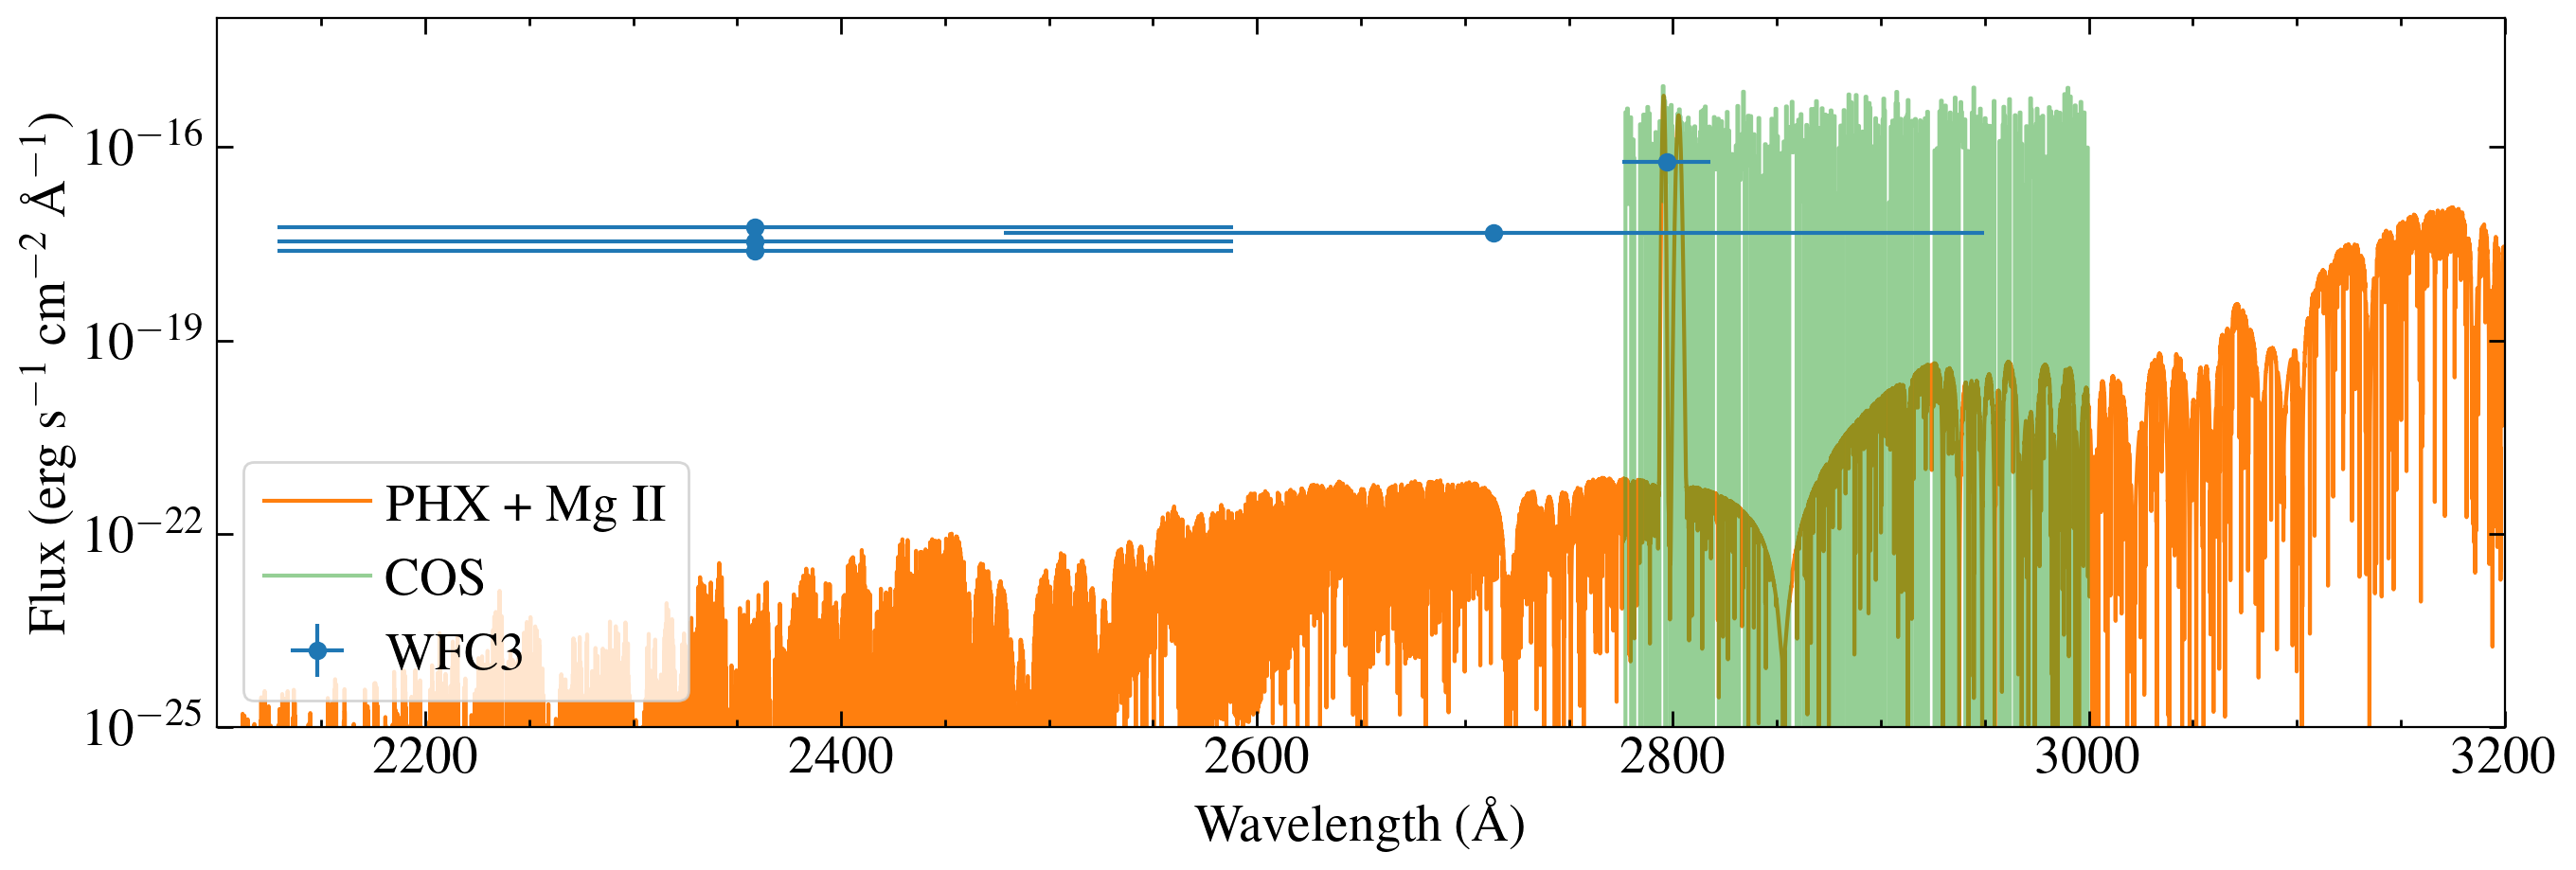

In [54]:
print(filters, fluxes, flux_errs, np.array(fluxes)/np.array(flux_errs))
cenwaves = [2713.86, 2796.94, 2358.70, 2358.70 , 2358.70]
widths = np.array([471.42, 42.16, 459.87 , 459.87 , 459.87 ])
bands = ['F275W', 'F280N', 'F225W']

fig, ax=plt.subplots()

w, f = np.loadtxt('t1uv_model_v2.dat', unpack=True)
plt.plot(w, f, zorder=-1, c='C1', label ='PHX + Mg II')

plt.step(wn, fn, alpha =0.5, where='mid', zorder=-1, c='C2', label='COS')
plt.errorbar(cenwaves, fluxes, yerr=flux_errs, xerr=widths/2, marker='o', ls='none', label='WFC3', zorder=10, c='C0')
 
ax.legend(frameon=True, loc=3)
    
plt.yscale('log')
plt.ylim(1e-25, 1e-14)
plt.xlim(2100, 3200)

ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()



Need to integrate the model over the fliters so I'm sure it's not just the Mg II lines... pysynphot doesn't work for python 3.10, have to do it by hand.

In [55]:
def make_phot(bp_w, bp_cc, w, f):
    mask = (w >= bp_w[0]) & (w <= bp_w[-1])
    w, f = w[mask], f[mask]
    bb_cci = interp1d(bp_w, bp_cc, fill_value='extrapolate')(w)
    return np.trapz(f*bb_cci, w)/np.trapz(bb_cci, w)

In [56]:
bands= glob.glob('filters/*UVIS*')
bands

['filters/HST_WFC3_UVIS2.F275W.dat',
 'filters/HST_WFC3_UVIS2.F225W.dat',
 'filters/HST_WFC3_UVIS2.F280N.dat']

In [ ]:
phot_w = np.array([2713.86, 2358.7, 2796.94])
phot_f = []
for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    phot = make_phot(bpw, bpf, w, f)
    phot_f.append(phot)
print(phot_f)

In [ ]:
# print(filters, fluxes, flux_errs, np.array(fluxes)/np.array(flux_errs))
# cenwaves = [2713.86, 2796.94, 2358.70, 2358.70 , 2358.70]
# widths = np.array([471.42, 42.16, 459.87 , 459.87 , 459.87 ])



fig, ax=plt.subplots(figsize=(11, 5))

w, f = np.loadtxt('t1uv_model_v2.dat', unpack=True)
plt.plot(w, f, zorder=-1, c='C1', label ='Model (PHX + Mg II)')




plt.step(wn, fn, alpha =0.5, where='mid', zorder=-1, c='C2', label='COS G230L')
plt.errorbar(cenwaves, fluxes, yerr=flux_errs, marker='o', ls='none', label='WFC3 Photometry', zorder=10, c='C0')
plt.errorbar(phot_w, phot_f, marker='x', ls='none', label='Model to Photometry', zorder=8, c='C3')



    
# ax.legend(frameon=True, loc=1)
    
plt.yscale('log')
plt.ylim(2e-25, 9e-15)
plt.xlim(2101, 3300)

for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    ax.plot(bpw, bpf*1e-20, ls ='--', c='C4', label = 'Transmission Profiles')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=1)
    
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()

fig.savefig('plots/t1_wfc3_epoch{}_1stlook.pdf'.format(epoch))
fig.savefig('plots/t1_wfc3_epoch{}_1stlook.png'.format(epoch), facecolor='w')

Making a simple model to estimate the flux at 2200

In [ ]:
# print(filters, fluxes, flux_errs, np.array(fluxes)/np.array(flux_errs))
# cenwaves = [2713.86, 2796.94, 2358.70, 2358.70 , 2358.70]
# widths = np.array([471.42, 42.16, 459.87 , 459.87 , 459.87 ])



fig, ax=plt.subplots(figsize=(11, 5))

w, f = np.loadtxt('t1uv_model_v2.dat', unpack=True)
plt.plot(w, f, zorder=-1, c='C1', label ='Model (PHX + Mg II)')

nuv = fits.getdata('{}hlsp_muscles_hst_cos_trappist-1_g230l_v10_component-spec.fits'.format(mpath), 1)
wn, fn, en = nuv['WAVELENGTH'], nuv['FLUX'], nuv['ERROR']
# mask = (wn < 3000)
# wn, fn, en = wn[mask], fn[mask], en[mask]


plt.step(wn, fn, alpha =0.5, where='mid', zorder=-1, c='C2', label='COS G230L')
plt.errorbar(cenwaves, fluxes, yerr=flux_errs, marker='o', ls='none', label='WFC3 Photometry', zorder=10, c='C0')
plt.errorbar(phot_w, phot_f, marker='x', ls='none', label='Model to Photometry', zorder=8, c='C3')


#add a line
mod1 = models.Const1D(3e-18)
fmod1 = mod1(w)
nf = f + fmod1
# nf = fmod1

new_mod_f = []
for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    phot = make_phot(bpw, bpf, w, nf)
    new_mod_f.append(phot)

    
plt.plot(w, nf, c='C5', zorder=5, label = 'Model + Constant')
plt.errorbar(phot_w, new_mod_f, marker='p', ls='none', label='New Model Photometry', zorder=11, c='C3',)





# ax.legend(frameon=True, loc=1)
    
plt.yscale('log')
plt.ylim(2e-25, 9e-15)
plt.xlim(2001, 3400)

for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    ax.plot(bpw, bpf*1e-20, ls ='--', c='C4', label = 'Transmission Profiles')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=1)
    
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()

# fig.savefig('plots/t1_wfc3_epoch{}_1stlook.pdf'.format(epoch))
fig.savefig('plots/t1_nuv_constant_model.pdf'.format(epoch))
# fig.savefig('plots/t1_wfc3_epoch{}_1stlook.png'.format(epoch), facecolor='w')




In [ ]:
22.5 -  2.5*np.log10(3e-18)

Next step - work out the timings/subexposures of the photometry.

In [ ]:


mids = (starts + ends) / 2
halfs = (mids - starts)*u.d.to(u.min)
mids0 = (mids-min(starts))*u.d.to(u.min)

In [ ]:
plt.errorbar(mids0, fluxes, yerr=flux_errs, xerr=halfs, ls='none')

All over the place? Look at individual flt images?

In [ ]:
flcs

In [ ]:
def make_PAMcorr_image_UVIS(data, scihdr, pamdir):
    """
    Corrects the geometric distortion of the input image
    data by multiplying by the correct UVIS PAM.
    Parameters
    ----------
    data : array
        Image data before correction.
    scihdr : header
        Header from science extension of data.
    pamdir : str
        Path to where pixel area maps for UVIS1 and/or
        UVIS2 are located.
    Returns
    -------
    pamcorr_data : array
        PAM-corrected data.
    """

    data = np.copy(data)
    x0 = int(np.abs(scihdr['LTV1']))
    y0 = int(np.abs(scihdr['LTV2']))
    x1 = int(x0 + scihdr['NAXIS1'])
    y1 = int(y0 + scihdr['NAXIS2'])
    

    if scihdr['CCDCHIP'] == 1:
        pam = fits.getdata(pamdir + 'UVIS1wfc3_map.fits')
        pamcorr_data = data * pam[y0:y1, x0:x1]

    elif scihdr['CCDCHIP'] == 2:
        pam = fits.getdata(pamdir + 'UVIS2wfc3_map.fits')
        pamcorr_data = data * pam[y0:y1, x0:x1]
    else:
        raise Exception('Chip case not handled.')

    return pamcorr_data

In [ ]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for flc in flcs:
    hdr = fits.getheader(flc, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ASN_ID'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
args = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[args], bands[args], times[args], expt[args], dates[args], datasets[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

for i in range(len(flcs)):
    print('{} & WFC3/UVIS & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

Redoing photometry with flc files 

In [ ]:
# wfc3_pos = [(489.752, 751.70)]
wfc3_pos = [(484, 720)]
pixscale = 0.039
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
counts = []
counts_errs = []
bkgs = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
flcsort = np.array(flcs)[args]
for flc in flcsort:
    print(flc)
    hdul = fits.open(flc)
    filt = hdul[0].header['FILTER'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
    data = make_PAMcorr_image_UVIS(data, hdul[1].header, '{}../pams/'.format(path))
#     data = np.nan_to_num(data, 0.0)
    error = hdul[2].data
    dq = hdul[3].data
    mask = dq != 0
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(450, 549)
    plt.ylim(675, 775)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(wfc3_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(wfc3_pos, r_in=ap_pix+5, r_out=ap_pix+15)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture, error=error, mask=mask)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
#     phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
#     phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam / (ee *exptime)
    flux_err = phot_table['aperture_sum_err'][0]* photflam / (ee *exptime)
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    counts.append(phot_table['aperture_sum_bkgsub'])
    counts_errs.append(phot_table['aperture_sum_err'])
    bkgs.append(phot_table['total_bkg'])

    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)



savdat = Table([starts, ends, expt, bands, fluxes*u.erg/u.s/u.cm**2/u.AA, flux_errs*u.erg/u.s/u.cm**2/u.AA, roots,counts ,counts_errs,bkgs], 
               names = ['EXPSTART', 'EXPEND', 'EXPTIME', 'FILTER', 'FLUX', 'ERROR', 'ROOTNAME', 'COUNTS', 'COUNTS_ERROR', 'BACKGROUND'])
savdat.write('results/epoch{}_wfc3_photometry.ecsv'.format(epoch), format='ascii.ecsv', overwrite=True)

In [ ]:
# plt.errorbar(starts, fluxes, yerr=flux_errs, ls='none',marker='o')
# plt.y

In [ ]:
# filters

In [ ]:
fig, ax=plt.subplots()

f280n = []
f275w = []
f225w= []

for i in range(len(starts)):
    time = starts[i] + ((expt[i]/2)/86400)
    if filters[i] == 'F280N':
        f280n.append(fluxes[i]*1e17)
        plt.errorbar(time, fluxes[i]*1e17, yerr=flux_errs[i]*1e17, ls='none',marker='o', c='C0', label=r'0.1\,$\times$\,F280N')
    elif filters[i] == 'F225W':
        f225w.append(fluxes[i]*1e18)
        plt.errorbar(time, fluxes[i]*1e18, yerr=flux_errs[i]*1e18, ls='none',marker='o', c='C1', label='F225W')
    if filters[i] == 'F275W':
        f275w.append(fluxes[i]*1e18)
        plt.errorbar(time, fluxes[i]*1e18, yerr=flux_errs[i]*1e18, ls='none',marker='o', c='C2', label='F275W')

plt.axhline(np.mean(f280n), ls='--', c='C0')
plt.axhline(np.mean(f225w), ls='--', c='C1')
plt.axhline(np.mean(f275w), ls='--', c='C2')

# plt.axhline(np.median(f280n), ls='-.', c='C0')
# plt.axhline(np.median(f225w), ls='-.', c='C1')
# plt.axhline(np.median(f275w), ls='-.', c='C2')
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=3) 

ax.set_xlabel('Time (MJD)')
ax.set_ylabel('Flux (10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

In [ ]:
fig, ax=plt.subplots()

f280n = []
f275w = []
f225w= []

for i in range(len(starts)):
    time = starts[i] + ((expt[i]/2)/86400)
    if filters[i] == 'F280N':
        f280n.append(fluxes[i]*1e17)
        plt.errorbar(time, counts[i]+bkgs[i], yerr=counts_errs[i], ls='none',marker='o', c='C0', label=r'F280N')
        plt.errorbar(time, bkgs[i], ls='none',marker='s', c='C0')
    if filters[i] == 'F225W':
        f225w.append(fluxes[i]*1e18)
        plt.errorbar(time, counts[i]+bkgs[i], yerr=counts_errs[i], ls='none',marker='o', c='C1', label='F225W')
        plt.errorbar(time, bkgs[i], ls='none',marker='s', c='C1')
    if filters[i] == 'F275W':
        f275w.append(fluxes[i]*1e18)
        plt.errorbar(time, counts[i]+bkgs[i], yerr=counts_errs[i], ls='none',marker='o', c='C2', label='F275W')
        plt.errorbar(time, bkgs[i], ls='none',marker='s', c='C2')



plt.axhline(0, ls='-.', c='0.5')
# plt.axhline(np.median(f225w), ls='-.', c='C1')
# plt.axhline(np.median(f275w), ls='-.', c='C2')
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=3) 

ax.set_xlabel('Time (MJD)')
# ax.set_ylabel('Flux (10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

In [ ]:
for i in range(len(starts)):
    print(filters[i], fluxes[i], flux_errs[i],  fluxes[i]/flux_errs[i])

In [ ]:
np.array(fluxes)/flux_errs

In [ ]:
300*u.ks.to(u.d)

I should really try to look at ACS...

In [ ]:
apath

In [ ]:
drzs = glob.glob('{}*drz.fits'.format(apath))
drzs

In [ ]:
roots = []
bands = []
times = []
expt = []
for drz in drzs:
    hdr = fits.getheader(drz, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER1'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
roots, bands, times, expt = np.array(roots), np.array(bands), np.array(times), np.array(expt)    
args = np.argsort(times)
roots, bands, times, expt = roots[args], bands[args], times[args], expt[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

In [ ]:
flts = glob.glob('{}*flt.fits'.format(apath))
flts


In [ ]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for flt in flts:
    hdr = fits.getheader(flt, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER1'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ASN_ID'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
args = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[args], bands[args], times[args], expt[args], dates[args], datasets[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

for i in range(len(flts)):
    print('{} & ACS/SBC & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

In [ ]:
# wfc3_pos = [(489.752, 751.70)]
# wfc3_pos = [(484, 720)]
acs_pos = [(333, 660)]
pixscale = 0.025
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
fltsort = np.array(flts)[args]
for flt in fltsort:
    print(flt)
    hdul = fits.open(flt)
    filt = hdul[0].header['FILTER1'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
#     data = make_PAMcorr_image_UVIS(data, hdul[1].header, '{}../pams/'.format(path))
#     data = np.nan_to_num(data, 0.0)
    error = hdul[2].data
    dq = hdul[3].data
    mask = dq != 0
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(300, 400)
    plt.ylim(600, 700)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(acs_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(acs_pos, r_in=ap_pix+5, r_out=ap_pix+15)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture, error=error, mask=mask)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
#     phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
#     phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
#     ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
    ee = 0.65
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam / (ee *exptime)
    flux_err = phot_table['aperture_sum_err'][0]* photflam / (ee *exptime)
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)

In [ ]:
plt.errorbar(starts, fluxes, yerr=flux_errs, ls='none',marker='o')
plt.axhline(0, ls='--', c='0.5')
# plt.yscale('log')

Ok so we use the drz images...

In [ ]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for drz in drzs:
    hdr = fits.getheader(drz, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER1'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ROOTNAME'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
args = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[args], bands[args], times[args], expt[args], dates[args], datasets[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

for i in range(len(drzs)):
    print('{} & ACS/SBC & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

In [ ]:
# wfc3_pos = [(489.752, 751.70)]
# wfc3_pos = [(484, 720)]
acs_pos = [(454, 830)]
pixscale = 0.025
ap_arc = '0.30' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
counts = []
counts_errs = []
bkgs = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
# fltsort = np.array(flts)[args]
for drz in drzs:
    print(drz)
    hdul = fits.open(drz)
    filt = hdul[0].header['FILTER1'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
#     data = make_PAMcorr_image_UVIS(data, hdul[1].header, '{}../pams/'.format(path))
#     data = np.nan_to_num(data, 0.0)
    error = hdul[2].data
    dq = hdul[3].data
#     mask = dq != 0
    error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(400, 500)
    plt.ylim(775, 875)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(acs_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(acs_pos, r_in=ap_pix+5, r_out=ap_pix+15)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture, error=error)#, mask=mask)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
#     phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
#     phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    if filt =='F150LP':
        ee = 0.715
    if filt == 'F165LP':
        ee = 0.704
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam / ee 
    flux_err = phot_table['aperture_sum_err'][0]* photflam / ee
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    counts.append(phot_table['aperture_sum_bkgsub'])
    counts_errs.append(phot_table['aperture_sum_err'])
    bkgs.append(phot_table['total_bkg'])

    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)



savdat = Table([starts, ends, expt, bands, fluxes*u.erg/u.s/u.cm**2/u.AA, flux_errs*u.erg/u.s/u.cm**2/u.AA, roots,counts ,counts_errs,bkgs], 
               names = ['EXPSTART', 'EXPEND', 'EXPTIME', 'FILTER', 'FLUX', 'ERROR', 'ROOTNAME', 'COUNTS', 'COUNTS_ERROR', 'BACKGROUND'])
savdat.write('results/epoch{}_acs_photometry.ecsv'.format(epoch), format='ascii.ecsv', overwrite=True)

In [ ]:
plt.errorbar(starts, fluxes, yerr=flux_errs, ls='none',marker='o')
plt.axhline(0, ls='--', c='0.5')
# plt.yscale('log')

In [ ]:
(0.696+0.701+0.715)/3